In [102]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score


In [103]:
df = pd.read_csv("Prices_Clean.csv")

In [104]:
df.head()

,Price (Dollar),discount_percentage,price_before_discount,rating_out_of_5,number_of_ratings,brand,Storage (GB),screen_size (Inches),Price_Category
0,168.39,5.93,179.00,4.4,64918.0,15,64.0,6.10,0
1,230.00,0.00,230.00,4.2,52613.0,15,64.0,6.10,1
2,287.00,0.00,287.00,4.1,25403.0,15,64.0,6.10,1
3,329.99,0.00,329.99,4.3,25133.0,119,128.0,6.43,1
4,182.00,0.00,182.00,4.2,21859.0,15,64.0,5.80,0


In [105]:
df.drop('Price_Category', axis=1, inplace= True)

In [106]:
df.describe()

,Price (Dollar),discount_percentage,price_before_discount,rating_out_of_5,number_of_ratings,brand,Storage (GB),screen_size (Inches)
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,270.037174,5.406922,292.486060,3.851033,472.184383,113.346096,140.865965,6.171849
std,248.601572,12.687932,274.538746,0.716440,2479.701071,54.250619,155.532884,3.354296
min,14.020000,0.000000,14.020000,1.000000,1.000000,0.000000,0.000000,0.660000
25%,99.900000,0.000000,104.000000,3.600000,10.000000,73.000000,32.000000,6.100000
50%,187.990000,0.000000,199.720000,4.000000,47.000000,138.000000,128.000000,6.500000
75%,339.990000,4.930000,369.990000,4.200000,217.000000,138.000000,256.000000,6.700000
max,1785.000000,93.000000,2332.710000,5.000000,64918.000000,211.000000,1024.000000,78.600000


In [107]:
# Crear categorías para el precio (por ejemplo, 3 clases)
df['Price_Category'] = pd.cut(df['price_before_discount'], bins=[0, 200 ,400, np.inf], labels=[0, 1, 2])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Price (Dollar)", 'discount_percentage','price_before_discount', 'Price_Category']),
    df["Price_Category"],
    test_size=0.3, random_state=42)

In [75]:
"""# Definir el modelo
model = GradientBoostingClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [300, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.5, 0.8, 1.0],
    'max_features': ['sqrt']
}

# Realizar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
"""

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}


In [145]:
model0 = GradientBoostingClassifier()

In [156]:
# Crear el modelo con los hiperparámetros óptimos
model = GradientBoostingClassifier(
    n_estimators=300, 
    learning_rate=0.01, 
    max_depth=3, 
    subsample=0.8,
    max_features= 'sqrt',
    min_samples_split=2
)


# Aplicar la validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=10)

# Mostrar los resultados
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Entrenar el modelo
model.fit(X_train, y_train)
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)


Cross-validation scores: [0.66906475 0.76978417 0.74100719 0.69784173 0.73381295 0.63309353
 0.64748201 0.69064748 0.71223022 0.70289855]
Mean cross-validation score: 0.6997862579501616


In [136]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7449664429530202
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       303
           1       0.56      0.53      0.55       149
           2       0.81      0.66      0.73       144

    accuracy                           0.74       596
   macro avg       0.72      0.69      0.70       596
weighted avg       0.74      0.74      0.74       596



In [142]:
# Supongamos que ya tienes X_train, X_test, y_train, y_test y el modelo entrenado (model)

# Calcular la exactitud en el conjunto de entrenamiento
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Calcular la exactitud en el conjunto de prueba
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Mostrar las métricas de rendimiento
print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')
print(f'Exactitud en el conjunto de prueba: {test_accuracy:.2f}')

# Analizar el grado de bias
if train_accuracy < 0.6 and test_accuracy < 0.6:
    print("Sesgo alto (El modelo no está capturando bien la relación en los datos)")
elif 0.6 <= train_accuracy < 0.9 and 0.6 <= test_accuracy < 0.9:
    print("Sesgo medio (El modelo está capturando la relación, pero puede mejorar)")
elif train_accuracy >= 0.9 and test_accuracy >= 0.9:
    print("Sesgo bajo (El modelo está capturando bien la relación en los datos)")
else:
    print("Posible sobreajuste (El modelo tiene un bajo sesgo pero alta varianza)")


Exactitud en el conjunto de entrenamiento: 0.88
Exactitud en el conjunto de prueba: 0.75
Sesgo medio (El modelo está capturando la relación, pero puede mejorar)


In [143]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Supongamos que ya tienes X_train, X_test, y_train, y_test definidos y un modelo entrenado
# X_train, X_test, y_train, y_test = [...]  # Tus conjuntos de datos
# modelo = [...]  # Tu modelo ya entrenado

# Realizar predicciones en el conjunto de prueba
#y_pred = modelo.predict(X_test)

# Calcular el MSE (Error Cuadrático Medio) en los datos de prueba
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Aquí no se está usando validación cruzada, por lo que el MSE es una sola medición
# Si quieres realizar múltiples particiones, podrías aplicar un bucle o realizar más experimentos

# Diagnóstico de la varianza: Como no hay múltiples MSE, lo que calculas aquí es el diagnóstico general
if mse < 0.1:
    diagnostico = "Bajo"
elif 0.1 <= mse < 0.35:
    diagnostico = "Medio"
else:
    diagnostico = "Alto"

# Imprimir los resultados
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Grado de varianza: {diagnostico}")


Error Cuadrático Medio (MSE): 0.34731543624161076
Grado de varianza: Medio


In [158]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular las métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')

# Calcular las métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Evaluar las diferencias en las métricas
diferencia_accuracy = accuracy_train - accuracy_test
diferencia_f1 = f1_train - f1_test
diferencia_precision = precision_train - precision_test
diferencia_recall = recall_train - recall_test

# Diagnóstico del nivel de ajuste
if accuracy_train < 0.70 and accuracy_test < 0.70:
    diagnostico = "Underfitting"
elif (diferencia_accuracy < 0.05 and 
      diferencia_f1 < 0.05 and 
      diferencia_precision < 0.5 and 
      diferencia_recall < 0.05):
    diagnostico = "Fitting"
else:
    diagnostico = "Overfitting"

# Imprimir resultados
print(f"Accuracy en entrenamiento: {accuracy_train:.2f}")
print(f"Accuracy en prueba: {accuracy_test:.2f}")
print(f"Diferencia en accuracy: {diferencia_accuracy:.2f}")
print(f"F1-Score en entrenamiento: {f1_train:.2f}")
print(f"F1-Score en prueba: {f1_test:.2f}")
print(f"Diferencia en F1-Score: {diferencia_f1:.2f}")
print(f"Precision en entrenamiento: {precision_train:.2f}")
print(f"Precision en prueba: {precision_test:.2f}")
print(f"Diferencia en Precision: {diferencia_precision:.2f}")
print(f"Recall en entrenamiento: {recall_train:.2f}")
print(f"Recall en prueba: {recall_test:.2f}")
print(f"Diferencia en Recall: {diferencia_recall:.2f}")
print(f"Nivel de ajuste del modelo: {diagnostico}")


Accuracy en entrenamiento: 0.75
Accuracy en prueba: 0.71
Diferencia en accuracy: 0.04
F1-Score en entrenamiento: 0.74
F1-Score en prueba: 0.70
Diferencia en F1-Score: 0.04
Precision en entrenamiento: 0.75
Precision en prueba: 0.71
Diferencia en Precision: 0.04
Recall en entrenamiento: 0.75
Recall en prueba: 0.71
Diferencia en Recall: 0.04
Nivel de ajuste del modelo: Fitting


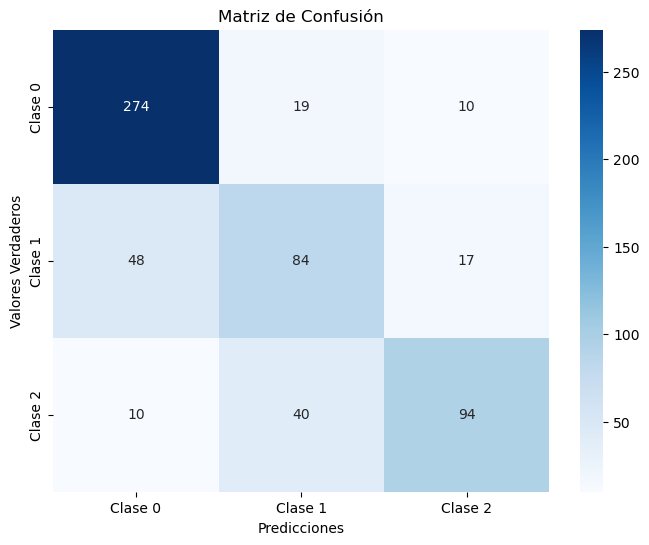

In [118]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], 
            yticklabels=['Clase 0', 'Clase 1',  'Clase 2'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


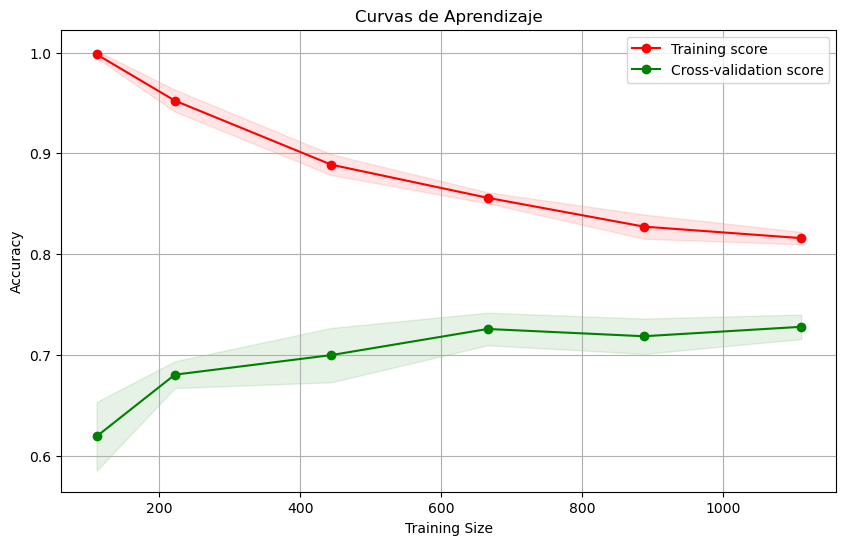

In [150]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Función para graficar curvas de aprendizaje
def plot_learning_curve(modelo, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
    )

    # Promedio y desviación estándar
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title('Curvas de Aprendizaje')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Usar la función para graficar
plot_learning_curve(model, X_train, y_train)
